<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Beginner's Guide
This is meant as a companion for the SDK to the different composer examples in the [Beginner's Guide](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=introduction). All examples run with the local default simulation backend. You can import your Qconfig and configure the API if you would like to run on a real device. 

All images are from the Beginner's Guide in the referenced sections. This does not include the detailed text of the Beginner's Guide. It is designed to show how the composer examples can be executed with the SDK.

***
### Contributors
Evan Kepner

In [8]:
import os
import sys

from IPython.display import Image

# from qiskit import QuantumProgram
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, execute
from qiskit.tools.visualization import plot_histogram #, circuit_drawer
from qiskit.tools.visualization import matplotlib_circuit_drawer as circuit_drawer

# Helper functions
These lines of code are used throughout the tutorial as helper functions. These are used to display local images for the composer references, and execute and plot circuits in the quantum program.

In [9]:
def show_image(img_name):
    """Display an image in the notebook.
    
    This is set to the default path of the root of the tutorials repo
    images directory in the sub-folder 'intro_img'.
    
    Args:
        img_name (str): file name to display
    """
    return Image(filename=os.path.join("..", "images", "intro_img", img_name))

def execute_and_plot(circuit):
    """Execute and plot the histograms with default settings.
    
    Args:
        qp: QuantumProgram containing the circuits
        circuits (list): list of circuits to execute
    """
    results = execute(circuit, backend='local_qasm_simulator')
    plot_histogram(results.result().get_counts(circuit))

# Quantum Program Setup
We're starting with a single qubit and classical register.

In [10]:
# qp = QuantumProgram()

n = 1  # number of qubits
# q = qp.create_quantum_register("q", n)
# c = qp.create_classical_register("c", n)
q = QuantumRegister(n)
c = ClassicalRegister(n)

# Single-Qubit Gates
Composer examples from the [Beginner's Guide](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=005-Single-Qubit_Gates~2F001-Single-Qubit_Gates).

## X-gate

In [11]:
# show_image("single_q_x_gate.png")

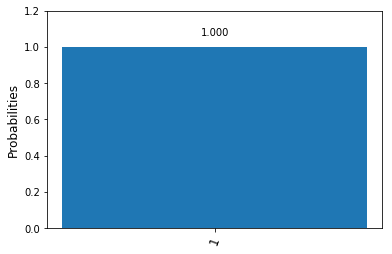

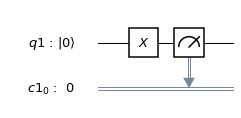

In [12]:
# single_x = qp.create_circuit("single_x", [q], [c])
single_x = QuantumCircuit(q,c)
single_x.x(q[0])
single_x.measure(q[0], c[0])
execute_and_plot(single_x)
circuit_drawer(single_x)

# Creating superposition
Composer examples from the [creating superposition](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=005-Single-Qubit_Gates~2F002-Creating_superposition) section.

## H-gate

In [13]:
# show_image("single_q_h_gate_0.png")

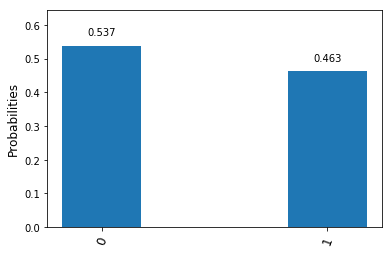

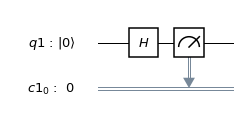

In [14]:
single_h = QuantumCircuit(q,c)
single_h.h(q[0])
single_h.measure(q[0], c[0])
execute_and_plot(single_h)
circuit_drawer(single_h)

In [15]:
# show_image("single_q_h_gate_1.png")

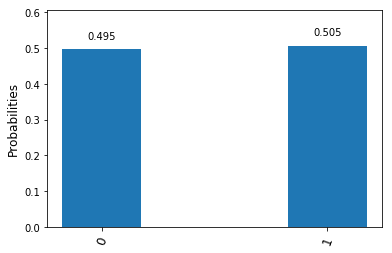

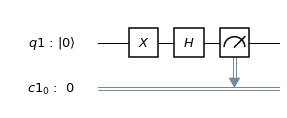

In [16]:
single_xh = QuantumCircuit(q, c)
single_xh.x(q[0])
single_xh.h(q[0])
single_xh.measure(q[0], c[0])
execute_and_plot(single_xh)
circuit_drawer(single_xh)

In [17]:
# show_image("single_q_h_gate_2.png")

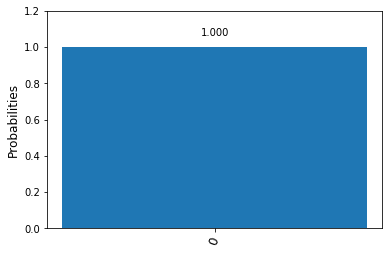

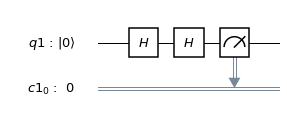

In [18]:
# This is the |+> state
single_hh = QuantumCircuit(q,c)
single_hh.h(q[0])
single_hh.h(q[0])
single_hh.measure(q[0], c[0])
execute_and_plot(single_hh)
circuit_drawer(single_hh)

In [19]:
# show_image("single_q_h_gate_3.png")

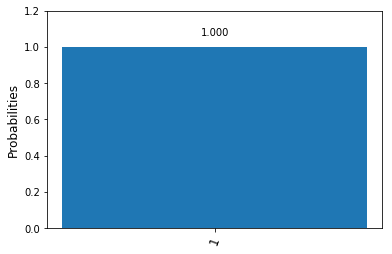

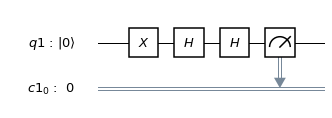

In [20]:
# This is the |-> state
single_xhh = QuantumCircuit(q, c)
single_xhh.x(q[0])
single_xhh.h(q[0])
single_xhh.h(q[0])
single_xhh.measure(q[0],c[0])
execute_and_plot(single_xhh)
circuit_drawer(single_xhh)

# Introducing qubit phase
These are the composer examples from [introducing qubit phase](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=005-Single-Qubit_Gates~2F005-Introducing_qubit_phase).

## Z-gate

In [21]:
# show_image("single_q_z_gate_0.png")

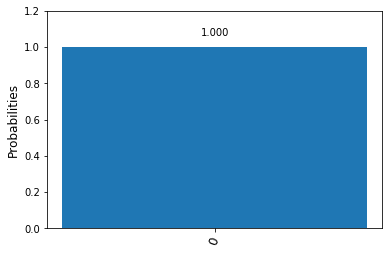

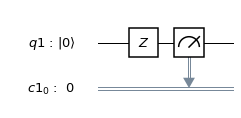

In [22]:
single_z = QuantumCircuit(q,c)
single_z.z(q[0])
single_z.measure(q[0],c[0])
execute_and_plot(single_z)
circuit_drawer(single_z)

In [23]:
# show_image("single_q_z_gate_1.png")

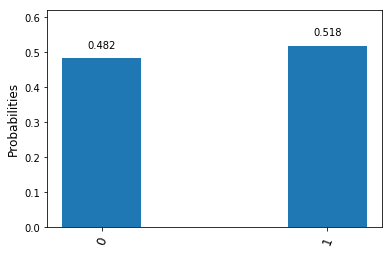

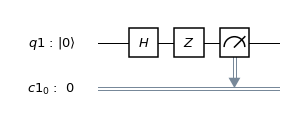

In [27]:
single_zh = QuantumCircuit(q,c)
single_zh.h(q[0])
single_zh.z(q[0])
single_zh.measure(q[0],c[0])
execute_and_plot(single_zh)
circuit_drawer(single_zh)

In [26]:
# show_image("single_q_z_gate_tbl.png")

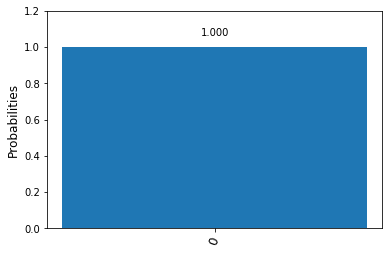

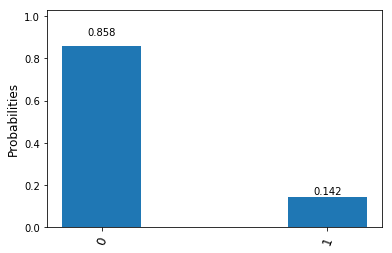

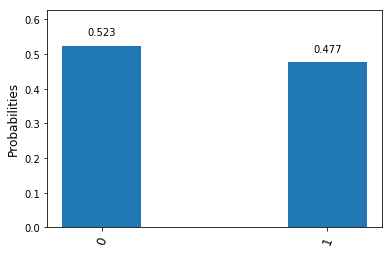

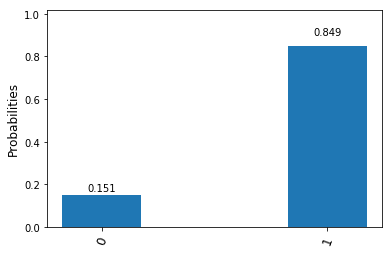

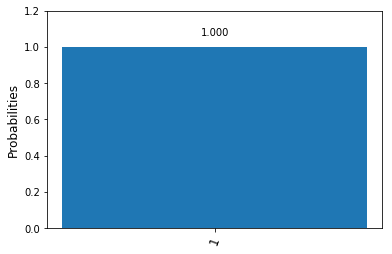

In [25]:
# 0 rotation around z, Pr(0) = 1.0
phs_0 = QuantumCircuit(q,c)
phs_0.h(q[0])
phs_0.h(q[0])  # for x-basis measurement
phs_0.measure(q[0], c[0])

# pi/4 rotation around z, Pr(0) = 0.85
phs_pi4 = QuantumCircuit(q,c)
phs_pi4.h(q[0])
phs_pi4.t(q[0])
phs_pi4.h(q[0])  # for x-basis measurement
phs_pi4.measure(q[0], c[0])

# pi/2 rotation around z, Pr(0) = 0.5
phs_pi2 = QuantumCircuit(q,c)
phs_pi2.h(q[0])
phs_pi2.s(q[0])
# Alternate example gate:
#phs_pi2.sdg(q[0])  #rotation -pi/2 using sdg instead of s
phs_pi2.h(q[0])  # for x-basis measurement
phs_pi2.measure(q[0], c[0])

# 3pi/4 rotation around z, Pr(0) = 0.15
phs_3pi4 = QuantumCircuit(q,c)
phs_3pi4.h(q[0])
phs_3pi4.s(q[0])
phs_3pi4.t(q[0])
phs_3pi4.h(q[0])  # for x-basis measurement
phs_3pi4.measure(q[0], c[0])

# pi rotation around z, Pr(0) = 0
phs_pi = QuantumCircuit(q,c)
phs_pi.h(q[0])
phs_pi.z(q[0])
phs_pi.h(q[0])  # for measurement
phs_pi.measure(q[0], c[0])

# execute_and_plot(qp, ["phs_0", "phs_pi4", "phs_pi2",
#                       "phs_3pi4", "phs_pi"])
# print('phs_0')
execute_and_plot(phs_0)
# circuit_drawer(phs_0)
# print('phs_pi4')
execute_and_plot(phs_pi4)
# circuit_drawer(phs_pi4)
# print('phs_pi2')
execute_and_plot(phs_pi2)
# circuit_drawer(phs_pi2)
# print('phs_3pi4')
execute_and_plot(phs_3pi4)
# circuit_drawer(phs_3pi4)
# print('phs_pi')
execute_and_plot(phs_pi)
# circuit_drawer(phs_pi)

# Multi qubit gates
Composer examples from [multi qubit gates](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=006-Multi-Qubit_Gates~2F001-Multi-Qubit_Gates) section. We set up new registers that have two qubits and classical components using the same quantum program.

In [24]:
n = 2  # number of qubits
q2 = QuantumRegister(n)
c2 = ClassicalRegister(n)

In [28]:
# show_image("multi_q_0.png")

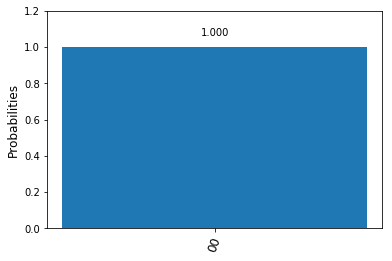

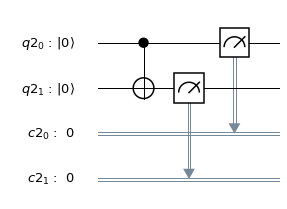

In [30]:
# |00> -- |00>
cnot_00 = QuantumCircuit(q2,c2)
cnot_00.cx(q2[0], q2[1])
cnot_00.measure(q2[0], c2[0])
cnot_00.measure(q2[1], c2[1])
execute_and_plot(cnot_00)
circuit_drawer(cnot_00)

In [29]:
# show_image("multi_q_1.png")

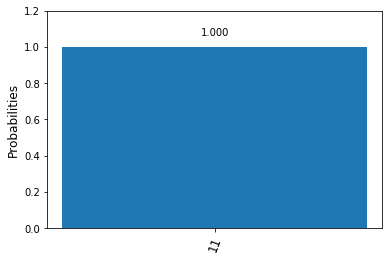

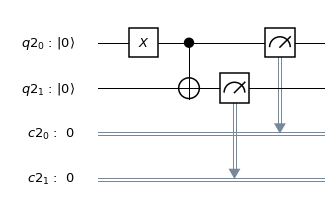

In [33]:
# |01> -- |11>
cnot_01 = QuantumCircuit(q2, c2)
cnot_01.x(q2[0])
cnot_01.cx(q2[0], q2[1])
cnot_01.measure(q2[0], c2[0])
cnot_01.measure(q2[1], c2[1])
execute_and_plot(cnot_01)
circuit_drawer(cnot_01)

In [32]:
# show_image("multi_q_2.png")

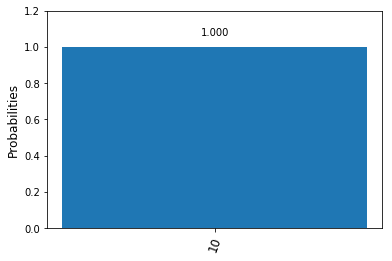

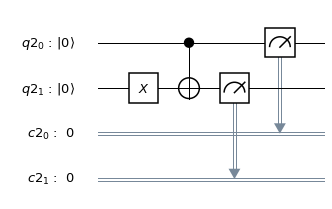

In [31]:
# |10> -- |10>
cnot_10 = QuantumCircuit(q2, c2)
cnot_10.x(q2[1])
cnot_10.cx(q2[0], q2[1])
cnot_10.measure(q2[0], c2[0])
cnot_10.measure(q2[1], c2[1])
execute_and_plot(cnot_10)
circuit_drawer(cnot_10)

In [37]:
# show_image("multi_q_3.png")

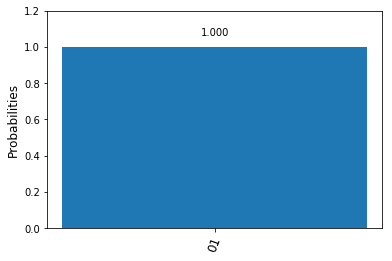

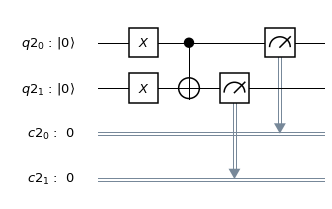

In [34]:
# |11> -- |01>
cnot_11 = QuantumCircuit(q2, c2)
cnot_11.x(q2[0])
cnot_11.x(q2[1])
cnot_11.cx(q2[0], q2[1])
cnot_11.measure(q2[0], c2[0])
cnot_11.measure(q2[1], c2[1])
execute_and_plot(cnot_11)
circuit_drawer(cnot_11)

# Entanglement
These are the [entanglemnt section](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=007-Entanglement~2F001-Entanglement) composer examples.

In [35]:
# show_image("ent_q_0.png")

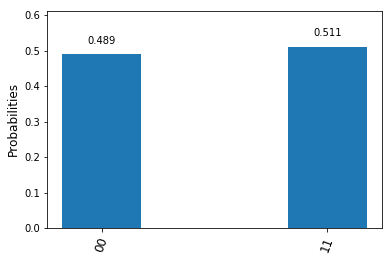

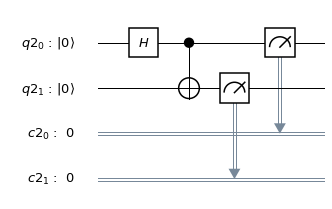

In [36]:
e0 = QuantumCircuit(q2, c2)
e0.h(q2[0])  # apply H-gate for superposition to q0
e0.cx(q2[0], q2[1])  # apply CNOT control from q0 to q1
e0.measure(q2[0], c2[0])
e0.measure(q2[1], c2[1])
execute_and_plot(e0)
circuit_drawer(e0)

In [38]:
# show_image("ent_q_1.png")

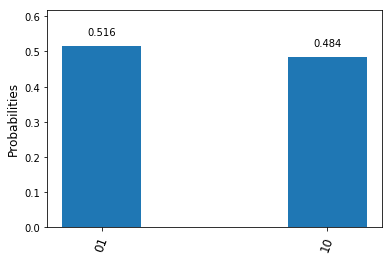

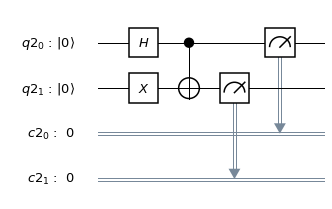

In [39]:
e1 = QuantumCircuit(q2, c2)
e1.h(q2[0])  # apply H-gate on q0 for superposition
e1.x(q2[1])  # apply x-gate on q1
e1.cx(q2[0], q2[1])  # apply CNOT control from q0 to q1
e1.measure(q2[0], c2[0])
e1.measure(q2[1], c2[1])
execute_and_plot(e1)
circuit_drawer(e1)